# 1.

### Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

A Simple Linear Regression (SLR) model describes the relationship between two variables: a predictor X and an outcome Y, using the equation 𝑌=𝛽0 + 𝛽1𝑋 + 𝜖. Here, β0 (intercept) is the is the expected value of 𝑌 when x = 0, β1 (slope) represents the rate of change in Y for a unit increase in X, and ϵ is an error term accounting for unexplained variability in Y, assumed to follow a normal distribution with mean 0. This model implies that for a given X, Y values are normally distributed around the predicted line.

#### Here’s code to demonstrate:

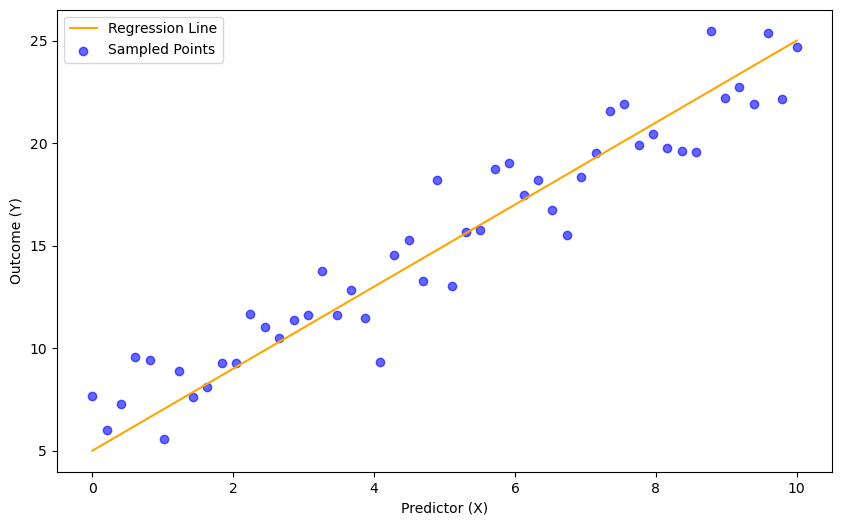

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Model parameters
beta_0, beta_1, sigma = 5, 2, 1.5
np.random.seed(0)
X = np.linspace(0, 10, 50)
Y_expected = beta_0 + beta_1 * X
Y_observed = Y_expected + np.random.normal(0, sigma, X.size)

plt.figure(figsize=(10, 6))
plt.plot(X, Y_expected, color='orange', label="Regression Line")
plt.scatter(X, Y_observed, color='blue', alpha=0.6, label="Sampled Points")
plt.xlabel("Predictor (X)")
plt.ylabel("Outcome (Y)")
plt.legend()
plt.show()


This code simulates observed Y values scattered around the regression line due to random errors.


# 2. 

### Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

In this example, we simulate a dataset based on our theoretical Simple Linear Regression model, generating predictor values X and corresponding outcome values Y with random noise. After storing X and Y in a pandas DataFrame, we fit a regression model using statsmodels' ols method, specifying the formula "Y ~ X". We then visualize the results by plotting the observed data points alongside the fitted regression line, illustrating how well the model captures the data pattern. Finally, the model summary displays key statistics, including coefficients, R-squared, and diagnostics that provide insight into the model’s fit.

#### Here is the code: 

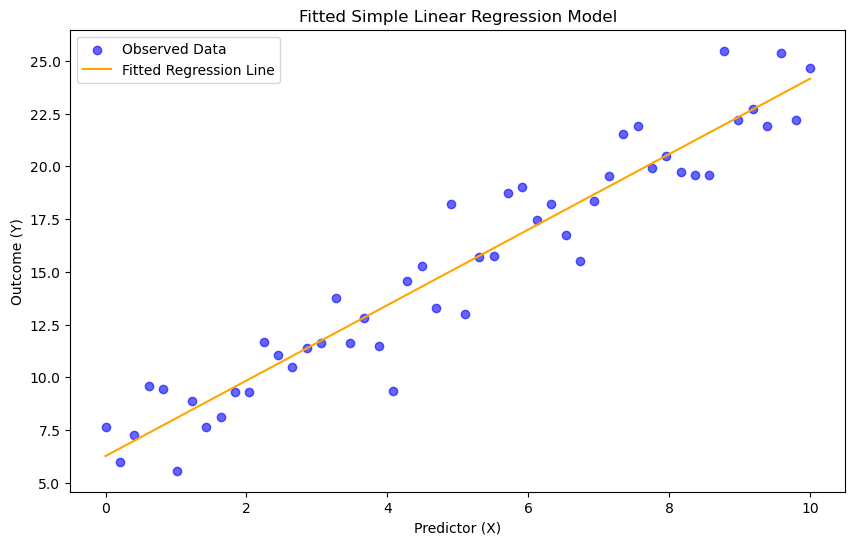

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     540.9
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           8.83e-28
Time:                        23:34:17   Log-Likelihood:                -93.465
No. Observations:                  50   AIC:                             190.9
Df Residuals:                      48   BIC:                             194.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2696      0.446     14.051      0.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

np.random.seed(0)
X = np.linspace(0, 10, 50)  # Predictor variable
beta_0, beta_1, sigma = 5, 2, 1.5  # Model parameters
Y = beta_0 + beta_1 * X + np.random.normal(0, sigma, X.size)  # Outcome variable

data = pd.DataFrame({'X': X, 'Y': Y})

model = smf.ols('Y ~ X', data=data).fit()

plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', alpha=0.6, label="Observed Data")
plt.plot(data['X'], model.predict(data['X']), color='orange', label="Fitted Regression Line")
plt.xlabel("Predictor (X)")
plt.ylabel("Outcome (Y)")
plt.title("Fitted Simple Linear Regression Model")
plt.legend()
plt.show()

print(model.summary())


# 3.

### Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

#### Here is the updated code:


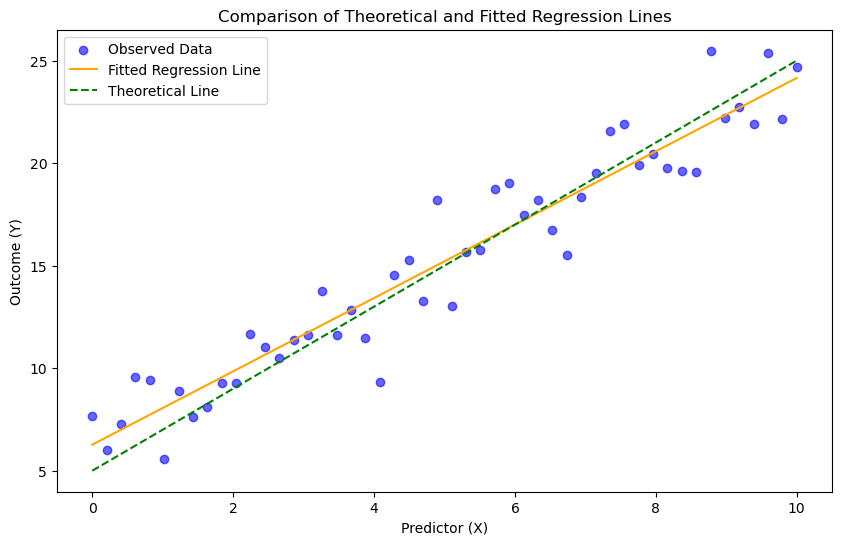

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     540.9
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           8.83e-28
Time:                        23:38:35   Log-Likelihood:                -93.465
No. Observations:                  50   AIC:                             190.9
Df Residuals:                      48   BIC:                             194.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2696      0.446     14.051      0.0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

np.random.seed(0)
X = np.linspace(0, 10, 50)
beta_0, beta_1, sigma = 5, 2, 1.5
Y = beta_0 + beta_1 * X + np.random.normal(0, sigma, X.size)

data = pd.DataFrame({'X': X, 'Y': Y})

model = smf.ols('Y ~ X', data=data).fit()

plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', alpha=0.6, label="Observed Data")
plt.plot(data['X'], model.predict(data['X']), color='orange', label="Fitted Regression Line")
plt.plot(data['X'], beta_0 + beta_1 * data['X'], color='green', linestyle='--', label="Theoretical Line")
plt.xlabel("Predictor (X)")
plt.ylabel("Outcome (Y)")
plt.title("Comparison of Theoretical and Fitted Regression Lines")
plt.legend()
plt.show()

print(model.summary())


In this plot, the green dashed line represents the theoretical regression line, which follows the true relationship 𝑌 = 𝛽0 + 𝛽1𝑋 without any error. The orange line, our fitted regression line, is estimated based on the simulated data that includes random sampling variation (the error term). Due to this variation, the fitted line may not exactly match the theoretical line, as it reflects the influence of random noise present in our sample. This demonstrates how real data often deviate from the theoretical model because of random sampling variation, leading to slight differences in the estimated coefficients.

# 4.

###  Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

The fitted_model.fittedvalues are the predicted 
𝑌 values based on the estimated intercept and slope from the model. These coefficients, found in fitted_model.params, represent the intercept (β0) and the slope (β1) of the fitted line. To calculate fitted_model.fittedvalues, each observed X value is plugged into the regression equation 𝑌pred = β0 + β1 * X producing the predicted Y values that define the fitted line. In essence, fitted_model.fittedvalues represent the expected values of Y based on the linear relationship the model identifies from the data.


# 5.

### Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

The line chosen for the fitted model in ordinary least squares (OLS) regression minimizes the sum of the squared differences (or "residuals") between the observed Y values and the predicted Y values on the line. By squaring these residuals, OLS emphasizes larger deviations, ensuring that the model line is as close as possible to all data points, particularly reducing the influence of outliers that could skew the fit if only absolute differences were used. This "squares" approach helps find the most accurate line that balances all deviations from the observed data.


# 6.

### Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.
1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
fitted_model.rsquared
np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2
np.corrcoef(Y,x)[0,1]**2

The first expression calculates the proportion of variation in  Y explained by the model by comparing the squared deviations of the observed Y values from the model's predictions to the total squared deviations of Y from its mean. Subtracting this ratio from 1 gives the fraction of Y's variation captured by the model, indicating how well it explains Y. This measure is also known as  R^2 , the same value given by fitted_model.rsquared, which reflects model accuracy in explaining Y.

The squared correlation between Y and the model's predictions, as well as the squared correlation between Y and X, also equals R^2i n Simple Linear Regression. This is because X is the only predictor, so the model's predictions and X itself have the same relationship to Y. Therefore, all three expressions measure the proportion of  Y 's variation explained by its linear relationship with X.


# 7.

Based on the provided data for the relationship between fertilizer use (Amount of Fertilizer in kg) and crop yield (Crop Yield in tons), two key assumptions of the Simple Linear Regression model do not seem compatible:

##### Linearity: The Simple Linear Regression model assumes a linear relationship between X (Amount of Fertilizer) and Y (Crop Yield). However, looking at the example data, as fertilizer increases—particularly beyond 4 kg—crop yield starts to rise sharply. For instance, at 4 kg, crop yield is around 112.2 tons, but by 7 kg it jumps to approximately 320.4 tons, and by 9.6 kg, it reaches about 558.9 tons. This rapid, accelerating growth suggests a nonlinear relationship, possibly exponential, which a linear model would struggle to capture accurately.

##### Constant Variance (Homoscedasticity): The model assumes that the residuals (differences between observed and predicted values) have constant variance across all levels of X. When analyzing the residuals for this dataset, the spread appears to increase as fertilizer amounts increase. For example, residuals are relatively small at low fertilizer levels (like 1–3 kg), but at higher levels (above 6 kg), the residuals spread out significantly, as seen in the residual histogram. This pattern, known as heteroscedasticity, indicates that predictions become less reliable at higher fertilizer levels, violating the model’s assumption of constant variance.

These points suggest that a Simple Linear Regression model may not be appropriate for this data, as it fails to capture the nonlinear growth and changing variance patterns in crop yield with increasing fertilizer use.

# 8.

### Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

To test for "no linear association (on average)" between the duration of Old Faithful eruptions and the waiting time until the next eruption, we specify our hypotheses as follows: the null hypothesis assumes no linear association, meaning the slope β1 = 0 in the relationship between waiting and duration. The alternative hypothesis suggests there is a linear association, so 𝛽1 ≠ 0. By examining the p-value associated with the slope, we can assess whether there’s enough evidence to reject the null hypothesis.

#### Here is the code:

In [4]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define and fit the linear model for duration based on waiting
linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()

# Print the summary of the fitted model
print(fitted_model.summary())


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        00:20:04   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.0

##### In interpreting the results, a small p-value for the slope coefficient indicates strong evidence against the null hypothesis, implying a likely linear relationship between waiting time and eruption duration. For example, if the p-value is below 0.05, we reject the null hypothesis and conclude there is a significant association, meaning that changes in waiting time correlate with changes in eruption duration. Conversely, a larger p-value (above 0.05) would mean we fail to reject the null hypothesis, indicating no strong evidence of a linear relationship between these variables in this dataset. This method allows us to characterize the relationship between waiting and duration without proving the null hypothesis true or false, simply assessing the evidence available in the data.


# 9.

To assess whether there is evidence for a relationship between geyser eruption duration and waiting time within the subset of shorter wait times (defined here as less than 62, 64, and 66 minutes), we perform separate linear regression analyses for each short wait limit. For each analysis, the null hypothesis is:

Null Hypothesis (H0): There is no linear association between waiting time and eruption duration for short wait times (i.e., slope β1=0).

#### The following code subsets the dataset based on each short wait limit, performs a linear regression on the restricted dataset, and visualizes the relationship with a scatter plot and trendline:


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


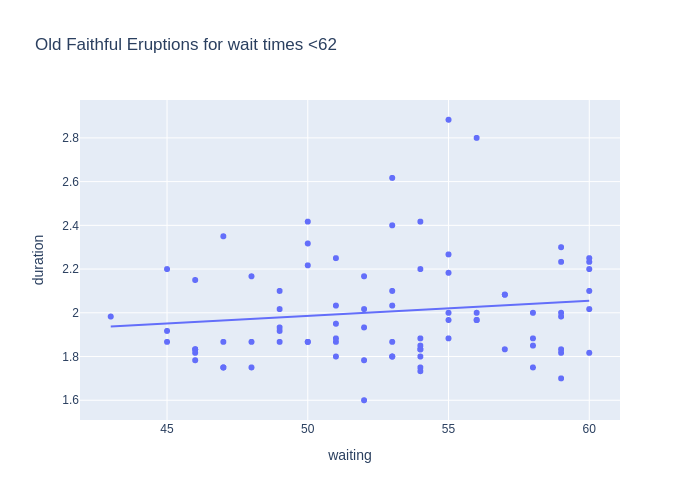

In [9]:
import plotly.express as px
import statsmodels.formula.api as smf

short_wait_limit = 62  # change to 64 or 66 to test other limits
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Eruptions for wait times <" + str(short_wait_limit), 
                 trendline='ols')
fig.show (renderer = 'png')


### Interpretation:

For each short wait limit (62, 64, and 66 minutes), examine the p-value associated with the slope coefficient in the summary table.

If the p-value is small (e.g., less than 0.05), we reject the null hypothesis, suggesting there is evidence of a relationship between waiting time and eruption duration even within this limited range of short wait times. This would indicate that even within shorter waiting periods, as waiting time increases, eruption duration tends to increase on average, showing a linear association similar to the full dataset.

If the p-value is large (greater than 0.05), we fail to reject the null hypothesis, meaning there is no strong evidence of a linear association between waiting time and duration in the short wait subset. This would imply that, within shorter wait times, the relationship between waiting time and duration might be weaker or non-existent.

By testing different short wait limits, we can see if the strength of the relationship persists as the wait time decreases, providing a nuanced view of the duration-waiting time relationship.

# 10.

#### To investigate the relationship between duration and waiting time for long wait times (greater than 71 minutes) in the Old Faithful dataset, we will:

- Create bootstrapped samples to generate the distribution of slope coefficients for a Simple Linear Regression model.
- Simulate data under the null hypothesis of "no linear association" to generate a sampling distribution of slope coefficients.
- Check if zero lies within the 95% bootstrapped confidence interval for the slope and calculate a simulated p-value.

#### Here’s the code for each part:


In [12]:
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import plotly.express as px

# Load the Old Faithful Geyser dataset and filter for long wait times
old_faithful = sns.load_dataset('geyser')
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Fit initial model for reference and display the summary table
initial_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
print(initial_model.summary().tables[1])

num_bootstraps = 1000
bootstrapped_slope_coefficients = []

for _ in range(num_bootstraps):
    # Sample with replacement to create a bootstrap sample
    bootstrap_sample = long_wait_data.sample(n=long_wait_data.shape[0], replace=True)
    # Fit model and collect slope
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(bootstrap_model.params.iloc[1])  # Using .iloc to access slope

# Visualize bootstrapped slope coefficients
fig1 = px.histogram(bootstrapped_slope_coefficients, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig1.show()

num_simulations = 1000
simulated_slope_coefficients = []
null_intercept = 1.65
null_slope = 0
null_error_sd = 0.37

for _ in range(num_simulations):
    # Copy data and simulate duration under null hypothesis
    old_faithful_simulation = long_wait_data.copy()
    old_faithful_simulation['duration'] = null_intercept + null_slope * old_faithful_simulation.waiting + \
                                          stats.norm(loc=0, scale=null_error_sd).rvs(size=long_wait_data.shape[0])
    # Fit model and collect slope
    simulated_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(simulated_model.params.iloc[1])  # Using .iloc to access slope

# Visualize simulated slope coefficients
fig2 = px.histogram(simulated_slope_coefficients, nbins=30, title="Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)")
fig2.show()

# 95% bootstrapped confidence interval for the slope
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)
ci_95 = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print("95% Bootstrapped Confidence Interval for Slope:", ci_95)

# Simulated p-value for testing against the observed slope
simulated_slope_coefficients = np.array(simulated_slope_coefficients)
observed_slope = initial_model.params.iloc[1]  # Using .iloc to access slope by position
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print("Simulated p-value:", p_value)

# Interpretation
if ci_95[0] <= 0 <= ci_95[1]:
    print("Zero is within the 95% confidence interval, suggesting no strong evidence against the null hypothesis.")
else:
    print("Zero is not within the 95% confidence interval, suggesting evidence against the null hypothesis.")

print(f"The simulated p-value is {p_value}. This compares to the p-value found in the model summary above.")


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


95% Bootstrapped Confidence Interval for Slope: [0.00056989 0.02235288]
Simulated p-value: 0.039
Zero is not within the 95% confidence interval, suggesting evidence against the null hypothesis.
The simulated p-value is 0.039. This compares to the p-value found in the model summary above.


# 11.

To explore the "big picture" differences between this new model specification and the previous ones, let's review the approaches:

### Previous Models:

In the previous models, we specified Simple Linear Regression as duration ~ waiting, fitting separate models on subsets of data classified as "short" (<64 minutes) or "long" (>71 minutes) wait times.
Each of these models estimated the relationship between waiting and duration within a single category, meaning we looked at the linear association of waiting with duration separately for "short" and "long" waits.

### New Model Specification with Indicator Variable:

In this new model, we use an indicator variable kind that categorizes wait times as "short" (<68 minutes) or "long" (≥68 minutes) in a single model: duration ~ C(kind, Treatment(reference="short")).
By including this indicator variable, the model allows us to assess the average difference in eruption duration between the "short" and "long" groups, while also evaluating if there’s an effect from this categorization on the overall relationship.
The indicator variable enables us to compare the intercepts of the two categories, capturing whether there's a statistically significant difference in average eruption duration between "short" and "long" wait times.

### Key Difference:

Unlike the separate models that examined the linear relationship within each group, this combined model specification lets us directly test if the "kind" (short or long wait) influences the duration, essentially testing if there is a significant difference in duration between the two groups.
This approach evaluates whether the category itself (kind) explains a meaningful difference in average eruption duration, providing a holistic view rather than splitting the data into separate linear fits.

### Here’s the code to fit the new model using an indicator variable and to display the results:


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


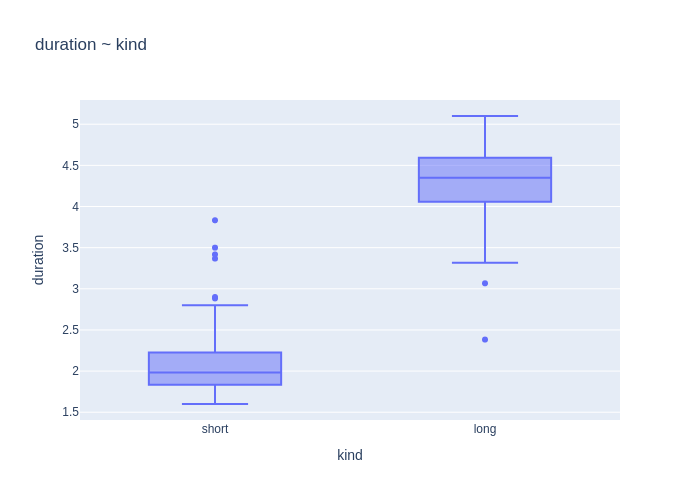

In [14]:
import plotly.express as px
import statsmodels.formula.api as smf
from IPython.display import display
import seaborn as sns

# Load dataset and categorize wait times as short (<68) or long (≥68)
old_faithful = sns.load_dataset('geyser')
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Fit the model using the indicator variable for kind
model_indicator = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display summary for the indicator variable model
display(model_indicator.summary().tables[1])

# Visualize boxplot for the effect of kind on duration
fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer = 'png')


# 12.

In assessing the plausibility of the assumption that error terms in each model are normally distributed, we evaluate the shape of each residual histogram compared to a normal distribution curve overlaid on each plot.

### Among the four models, Model 1 (using all data with duration ~ waiting) has a histogram that most closely resembles a normal distribution. The residuals are centered around zero, and the shape approximates a bell curve, suggesting that the normality assumption is reasonably met.

In contrast, the other three models deviate from this assumption:

#### Model 2 (short wait data) shows a less symmetric distribution with visible skewness, indicating that the residuals do not follow a normal distribution.

#### Model 3 (long wait data) also deviates from normality, displaying more extreme values and a shape that lacks the symmetry expected in a normal distribution.

#### Model 4 (all data using the kind indicator) exhibits irregularities and lacks a clear bell shape, suggesting that the residuals may not be normally distributed when using an indicator variable for "short" and "long" wait times.

### Therefore, only Model 1 supports the normality assumption for the error terms, while Models 2, 3, and 4 show distributions that do not align with this assumption, which could impact the reliability of inferences drawn from these models.


# 13.

### Code for (A) Permutation Test and (B) Bootstrapped Confidence Interval

#### Permutation Test (A): In this test, we shuffle the "short" and "long" labels across the duration values to simulate the null hypothesis of "no difference in means" between the groups. This generates a distribution of mean differences under the assumption that group labels don’t matter.

#### Bootstrap Confidence Interval (B): We generate a 95% confidence interval for the difference in means by repeatedly resampling with replacement within each group. For each resample, we calculate the difference in group means, generating a distribution from which we calculate the confidence interval.

### Here's the code:

In [15]:
import numpy as np
import seaborn as sns

# Load dataset and categorize wait times as short (<68) or long (≥68)
old_faithful = sns.load_dataset('geyser')
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Separate data into short and long groups
short_durations = old_faithful[old_faithful['kind'] == 'short']['duration']
long_durations = old_faithful[old_faithful['kind'] == 'long']['duration']

# (A) Permutation Test
np.random.seed(0)
num_permutations = 1000
observed_diff = long_durations.mean() - short_durations.mean()
permuted_diffs = []

for _ in range(num_permutations):
    combined = np.concatenate([short_durations, long_durations])
    np.random.shuffle(combined)
    permuted_short = combined[:len(short_durations)]
    permuted_long = combined[len(short_durations):]
    permuted_diff = permuted_long.mean() - permuted_short.mean()
    permuted_diffs.append(permuted_diff)

# Calculate p-value for permutation test
p_value_permutation = (np.abs(permuted_diffs) >= np.abs(observed_diff)).mean()
print("Permutation Test p-value:", p_value_permutation)

# (B) Bootstrap Confidence Interval for Difference in Means
num_bootstraps = 1000
bootstrapped_mean_differences = []

for _ in range(num_bootstraps):
    boot_short = np.random.choice(short_durations, size=len(short_durations), replace=True)
    boot_long = np.random.choice(long_durations, size=len(long_durations), replace=True)
    boot_diff = boot_long.mean() - boot_short.mean()
    bootstrapped_mean_differences.append(boot_diff)

# 95% Bootstrap Confidence Interval
ci_95 = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])
print("95% Bootstrap Confidence Interval for Difference in Means:", ci_95)


Permutation Test p-value: 0.0
95% Bootstrap Confidence Interval for Difference in Means: [2.10404563 2.30192427]


### Explanation of Sampling Approaches

#### (a) Sampling Approaches:

Permutation Test: This approach simulates the null hypothesis by randomly reassigning the "short" and "long" labels to the duration values. Each shuffle assumes that any observed difference in means could occur by chance. By calculating the mean difference for each shuffle, we create a distribution of differences under the null hypothesis. The p-value is then calculated as the proportion of permuted differences as extreme or more extreme than the observed difference.

Bootstrap Confidence Interval: This approach resamples with replacement within each group, treating each bootstrap sample as a potential representation of the population. For each resampling, we calculate the mean difference, building a distribution of mean differences. We then take the 2.5th and 97.5th percentiles of this distribution to construct the 95% confidence interval, representing the range of plausible mean differences between the groups.

#### (b) Comparison with the Indicator Variable-Based Model

Similarity: Both the permutation test and bootstrap confidence interval methods are designed to assess differences between "short" and "long" groups, similar to the indicator variable model, which directly tests if the kind (short/long) variable explains a difference in duration.

#### Difference:

Permutation and Bootstrap Tests: These approaches do not assume a specific linear model. Instead, they focus on directly comparing the means of the two groups. The permutation test assesses the likelihood of the observed mean difference under the null hypothesis, while the bootstrap provides an interval estimate of this difference.
Indicator Variable Model: This model incorporates the kind variable within a linear regression framework, treating it as an explanatory variable for predicting duration. It provides an estimate for the difference in intercepts between "short" and "long" groups, assuming a linear relationship and enabling us to test the significance of kind in a more structured model.

# 14.

mostly

# Chatbot session summary

#### Link to chatbot session: https://chatgpt.com/share/672d64a9-3d7c-8004-ae7e-c86acd68baa3

In this session, we discussed several key aspects of interpreting simple linear regression diagnostics and assumptions within a statistical modeling context. You asked about evaluating model fit and assumptions using regression outputs, including interpreting R^2 , testing for linear relationships, and assessing residuals for normality.

### 1.Simple Linear Regression Assumptions: We began by reviewing the assumptions of simple linear regression, focusing on linearity, constant variance (homoscedasticity), and normality of residuals. We discussed signs of assumption violations using sample data and how each assumption affects model validity.

### 2. Null Hypothesis Testing: We addressed how the null hypothesis of “no linear association” is tested through the slope parameter (𝛽1=0) and what constitutes evidence against this hypothesis, using p-values and regression summaries.

### 3.Residual Analysis and Normality Check: You provided code for generating residual histograms for multiple models (using different subsets of geyser eruption data). I explained how to assess these histograms to check the plausibility of normally distributed residuals, including looking for bell-shaped, symmetric distributions that align with the overlaid normal distribution line.

This session emphasized understanding regression diagnostics in depth, particularly focusing on visually and statistically assessing model assumptions for accuracy and robustness. Let me know if you need any further details for your homework or additional insights on regression diagnostics!

